In [1]:
import scanpy as sc
from utils import set_seeds
from anndata import AnnData

In [2]:
adata = sc.read("pancreas.h5ad")

         Falling back to preprocessing with `sc.pp.pca` and default params.


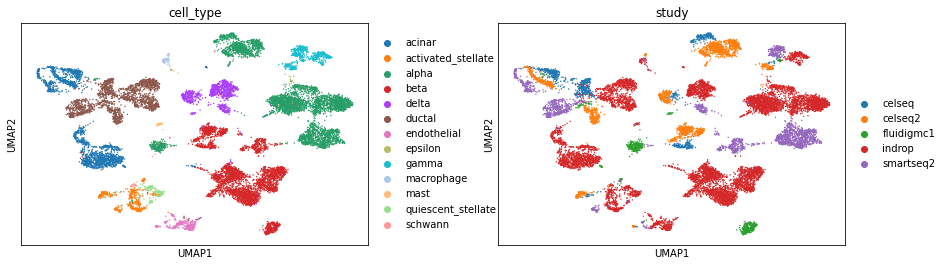

In [3]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['cell_type', 'study'], wspace=0.25)

In [4]:
from sklearn.preprocessing import LabelEncoder
from data import DatasetWithConfounder
from torch.utils.data import DataLoader
import time
import pytorch_lightning as pl

In [5]:
from models import HD_AE

In [6]:
train_set = DatasetWithConfounder(X=adata.X.copy(), Z=LabelEncoder().fit_transform(adata.obs.study))
train_loader = DataLoader(train_set, batch_size=128, shuffle=True)

In [7]:
hd_ae = HD_AE(
    adata,
    batch_key='study',
    layer_sizes = [adata.X.shape[1], 500, 250, 50],
    learning_rate = 1e-3,
    hsic_penalty = 1
)

In [ ]:
hd_ae.train(num_epochs=100)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name      | Type       | Params
-----------------------------------------
0 | encoder   | Sequential | 1.1 M 
1 | decoder   | Sequential | 1.1 M 
2 | criterion | MSELoss    | 0     
-----------------------------------------
2.3 M     Trainable params
0         Non-trainable params
2.3 M     Total params
9.119     Total estimated model params size (MB)


Epoch 0:   0%|          | 0/117 [00:00<?, ?it/s] 

/homes/gws/ewein/miniconda3/envs/HD-AE/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:52: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 24 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Epoch 40:  28%|██▊       | 33/117 [00:00<00:01, 77.15it/s, loss=0.0702, v_num=17, reconstruction_loss=0.0664, HSIC_loss=0.00162] 

In [ ]:
hd_ae_embeddings = hd_ae.embed_data(adata)

In [ ]:
sc.pp.neighbors(hd_ae_embeddings)
sc.tl.umap(hd_ae_embeddings)
sc.pl.umap(hd_ae_embeddings, color=['cell_type', 'study'], wspace=0.3)